# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer:

Local field potentials are transient signals generated in nerves and other tissues by the summed electrical activity of neurons at a particular region in brain. This type of signal is measured in outer space of a neuron cell, i.e. it's a "extracellular" signal. It shows summed electrical potential in a special region between neurons and it's local. That mean due to square-law decay of electrical force signal only comes from surrounding neurons and shows their activity versus time. 

What is Gamma frequency entrainment? Explain (5 points)

Your answer:

Genrally, brainwave entrainment refers to observation that brainwaves will naturally synchronize to the rhythm of external stimuli such as music, sound, light flickering or speech. This is the mechanism of how we comprehend different concepts and react to external stimulation. A gamma wave or gamma rhythm is a pattern of neural oscillation in humans brain with a frequency range between 25 and 140 Hz. It is widely believed that this specific neural wave type is correlated with perception, working memory and attention. Neurostimulation by a gamma-type external stimulation could affect brain functions and activity, which is called gamma frequency entrainment.


Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Recently, studies have explored the effect of 40Hz external stimulation on brain functions. Decreased gamma oscillation is associated with cognitive diseases such as memory dysfunction and alzeimer's disease. Studies have attempted to artificially induce gamma osillations by using sensory entrainment. These studies reported attenuation of amyloid load, hyper-phosphorylation of tau protein and improvement in overall cognition in alzeimer disease patients. In summary, gamma wave external synchronization can help brain function better and faster.

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [1]:
# import all the necessary libraries here 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

size
(1495741, 3)
(1495741, 1)


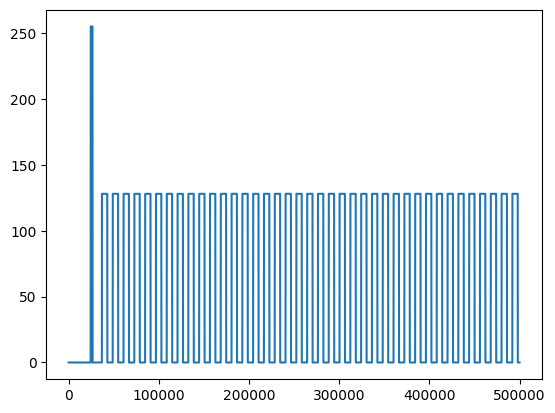

In [ ]:
#please change the directory path to where sessionData.mat file is located on your pc

data=sp.io.loadmat(r"D:\2 Master 2nd semester\HW1\sessionData.mat")
# Load the data from the file provided
#############################
# Your code goes here

#############################
print("size")
print(data["channelData"].shape)
print(data["digitalByte"].shape)

#plotting a section of digitalByte vector
plt.figure(1)
plt.plot(data["digitalByte"][0:500000,0])



# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.

explanation:
part 1. It is essential to apply a cutoff frequency of 300Hz on signal to remove action potential effects(spiking signals) from LFP data. What we want to study is synaptic activity and low-freqency changes in a particular region not fast spiking respones. Furthermore, excluding very low frequencies results in elimination of offset in signals. It means filtered signal does not have large offset.

part2. We need neural activity response of external stimuli, so we only need the section of data which is recorded at the same time duration as extrnal stimuli. 

part3. By applying z-score normalization to each trial, one can compare different trials with each other, because it is possible for trials to have different fluctuation rates. So, this normalization method, somehow, smooths signal variation at each trial. Besides, it puts the average of signal to zero. Zero mean data. 

In [3]:
# preprocess
fs=2000

def bandpass_filter(data, low_freq, high_freq):
    # Apply a band pass filter on the data
    #############################
    # Your code goes here
    order=5
    fs=2000

    b,a=sp.signal.butter(order,[low_freq,high_freq],fs=fs,btype="band")

    #############################
    return sp.signal.lfilter(b,a,data)



def convert_to_trials(data):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    
    region1={}
    region2={}
    region3={}
    k=0

    for i in range(len(data["digitalByte"])-1):
        if ((127.9<data["digitalByte"][i+1] and data["digitalByte"][i+1]<128.1) and (data["digitalByte"][i]<0.1)):
            k+=1
            
            region1[str(k)]=np.array([])
            region2[str(k)]=np.array([])
            region3[str(k)]=np.array([])
        elif ((127.9<data["digitalByte"][i] and data["digitalByte"][i]<128.1)):
            
            region1[str(k)]=np.append(region1[str(k)],data["channelData"][i,0])
            region2[str(k)]=np.append(region2[str(k)],data["channelData"][i,1])
            region3[str(k)]=np.append(region3[str(k)],data["channelData"][i,2])
        else:
            pass

        
    #############################
    return region1,region2,region3
    


def z_score(data):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    for i in range(120):
        for j in range(len(data)): #iterating over 3 regions
            m=np.mean(data[j][str(i+1)])
            s=np.std(data[j][str(i+1)])
            data[j][str(i+1)]=(data[j][str(i+1)]-m)/s

    #############################
    return data

#applying predefined functions to dataset

#applying bandpass filter function to each region
data["channelData"][:,0]=bandpass_filter(data["channelData"][:,0],1,300)
data["channelData"][:,1]=bandpass_filter(data["channelData"][:,1],1,300)
data["channelData"][:,2]=bandpass_filter(data["channelData"][:,2],1,300)

l1,l2,l3=convert_to_trials(data)
 
data_trials=[l1,l2,l3]

data_trials=z_score(data_trials)

#notice that this block cell takes about 20 seconds to be implented !

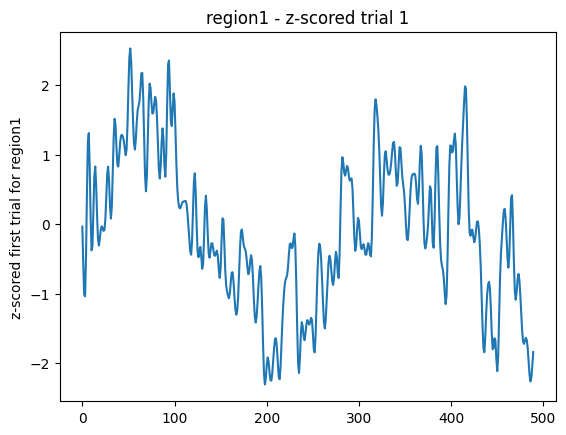

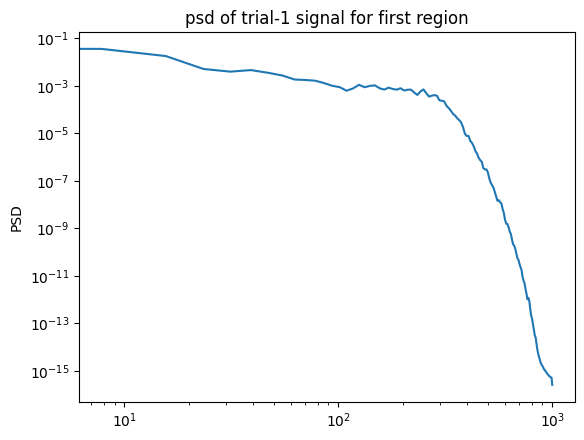

In [4]:

#plotting first trial of region-1 dataset(for instance)
sig=data_trials[0]["1"]

f=sp.signal.welch(sig,2000)[0]
ps=sp.signal.welch(sig,2000)[1]

plt.figure(0)
plt.plot(sig[10:500])
plt.title("region1 - z-scored trial 1")
plt.ylabel("z-scored first trial for region1")
plt.figure(1)
plt.title("psd of trial-1 signal for first region")
plt.ylabel("PSD")
plt.plot(f,ps)
plt.xscale("log")
plt.yscale("log")



 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer:

Hippocampus is one of the major parts in brain which is responsible for memory. This crucial curved organ converts short-term memory to long-term memory. Its one of the first parts which deteriorates during alzeimer disease progress.

mPFC is a region located in frontal part of head(brain). It acts as a control board and interconnect different neural regions. mPFC integrates information from input parts and send to output parts. It is believed that this part has some responsibility for high-order decision making and working memory.

The ventral striatum (VSt) is thought to be involved in the vigor of motivated behavior and is suggested to be a limbic-motor interface between limbic areas involved in motivational processes and neural circuits regulating behavioral outputs. However, there is little direct evidence demonstrating the involvement of the VSt in motor control for motivated behaviors.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer:

Event-related potential(ERP) is a average signal calculated from measured for example EEG of some part of brain. Due to random biophysical activity of neurons EEG data from a event in brain contains a lot of noise. Meaningful signal is needed and it shows the real response of the brain, therefore, many trials are implemented on brain and data is recorded, then, the average of all trials is defined as ERP of EEG. There will be little noise in ERP as long as number of trials is large enough. The exact formula for ERP can be understood from reading piece of code written below...

Text(0.5, 1.0, 'averaged signal over all trials - Region3')

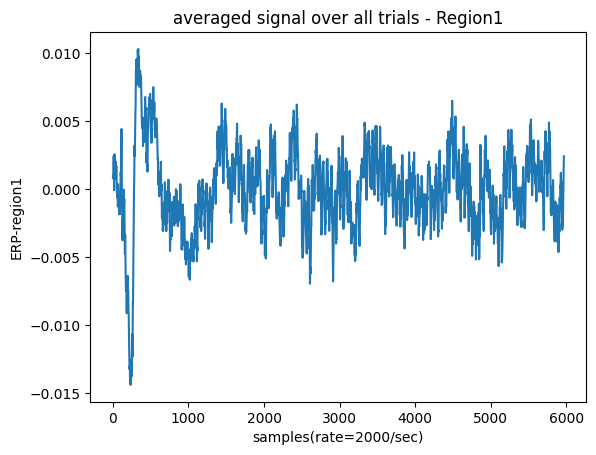

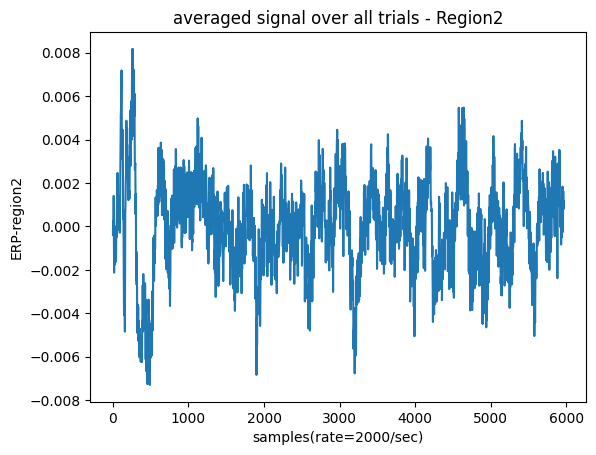

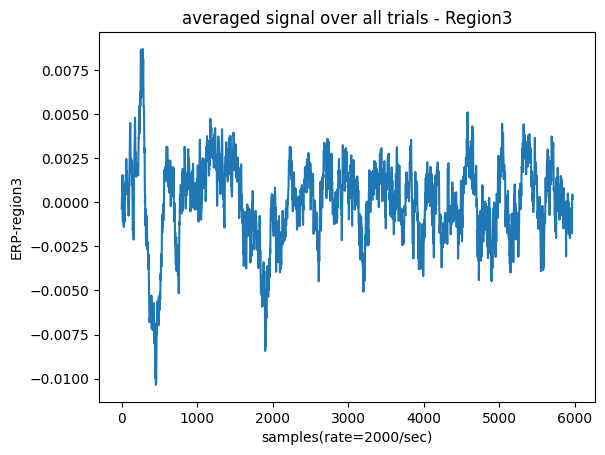

In [5]:
#ERP calculation

n=5970 #minimum sample number at each trial(slightly lower than 6000)

def ERP_calc(data):
    erp=np.array([])
    for i in range(n):
        s=0
        for j in range(120):
            s=s+data[str(j+1)][i]
        erp=np.append(erp,float(s/n))
    return erp    

erp1=ERP_calc(data_trials[0])
erp2=ERP_calc(data_trials[1])
erp3=ERP_calc(data_trials[2])

t=np.arange(0,n)
plt.figure(0)
plt.plot(t,erp1)
plt.xlabel("samples(rate=2000/sec)")
plt.ylabel("ERP-region1")
plt.title("averaged signal over all trials - Region1")

plt.figure(1)
plt.plot(t,erp2)
plt.xlabel("samples(rate=2000/sec)")
plt.ylabel("ERP-region2")
plt.title("averaged signal over all trials - Region2")

plt.figure(2)
plt.plot(t,erp3)
plt.xlabel("samples(rate=2000/sec)")
plt.ylabel("ERP-region3")
plt.title("averaged signal over all trials - Region3")
  
    
  

# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

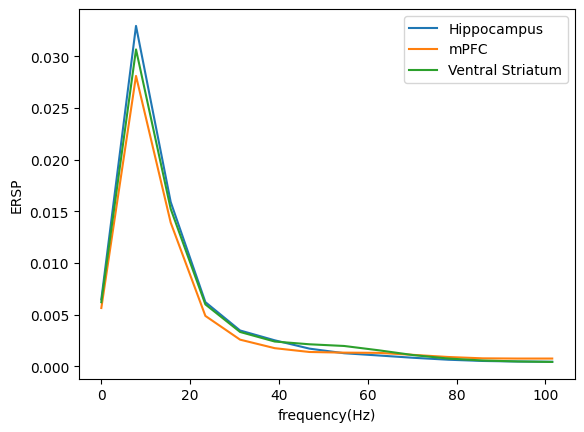

In [114]:
# ERSP calculation
def PSD(data, sample_rate):
    # Calsulate the PSD of the data
    #############################
    # Your code goes here
    return sp.signal.welch(data,sample_rate)
    #############################
    

def ERSP(trials): #input needs to be a dictionary
    # Calsulate the ERSP of the data
    #############################
    # Your code goes here
    n=5970
    rate=2000
    ersp=np.zeros(len(PSD(trials[str(1)][0:n],rate)[1]))
    for i in range(len(trials)):
        ersp=ersp+PSD(trials[str(i+1)][0:n],rate)[1]
    ersp=ersp/len(trials)    
        
    #############################
    return ersp

plt.figure(1)

plt.plot(f[0:14],ERSP(data_trials[0])[0:14],label="Hippocampus")
plt.plot(f[0:14],ERSP(data_trials[1])[0:14],label="mPFC")
plt.plot(f[0:14],ERSP(data_trials[2])[0:14],label="Ventral Striatum")
plt.xlabel("frequency(Hz)")
plt.ylabel("ERSP")
plt.legend()

From diagram above, one can infer that three spatially distant regions of brain have a same frequency response to trials stimuli, which is amazing, so the gamma wave frequency entrainment is easily seen in the diagram plotted above. 

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

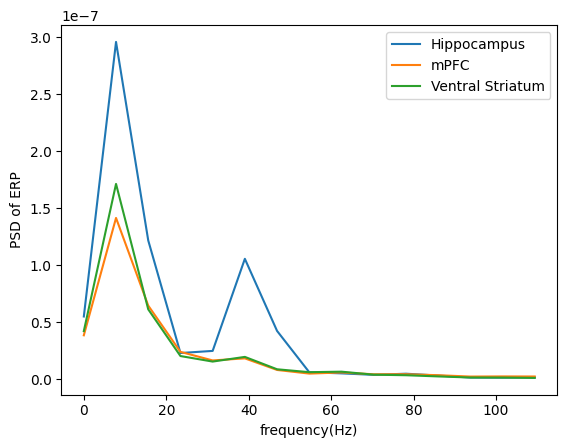

In [115]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here


#plotting psd of erp up to 400Hz frequency just to get better resolution
plt.figure()
plt.plot(f[0:15],PSD(erp1,fs)[1][0:15],label="Hippocampus")
plt.plot(f[0:15],PSD(erp2,fs)[1][0:15],label="mPFC")
plt.plot(f[0:15],PSD(erp3,fs)[1][0:15],label="Ventral Striatum")
plt.xlabel("frequency(Hz)")
plt.ylabel("PSD of ERP")
plt.legend()

#############################

Diagrams of PSD of ERP and ERSP for each brain region can be compared to each other. We plotted both quantities at last two parts.
It can easily be noticed that PSD of ERP contains more detailed information and it distinguishes between different brain regions.

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer:

Phase locked value(PLV) is a measure that shows how two signal from different brain regions are in phase. A measure of synchrony or coherency. For PLV calculation one needs a lot of trials to get average on. The avergage of absolute value of exponetial phase of phase difference over all trials is defined as PLV. If PLV is near 1 the signals are in phase but if it is near 0 they are out of phase. PLV is sensitive to volume conduction.
Phase lag index(PLI), like PLV measures how much two signals differ in phase value. Mathematical definition of PLV and PLI is different. But PLI is more sensitive to noise perturbation than PLV. The definition of PLI depends on sign of phase difference between signals and averaged sin() value of them. 

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

Weighted phase lag index or wPLI is another quantity which measures the coherency between two signals like x(t) and y(t). The only differences between PLI and wPLI is that, wPLI is a measure of phase-based connectivity calculated in a specific frequency, which accounts only for non-zero phase lag/lead relations between two time series signals. wPLI is calculated between two neurophysiologic signals and can assume values between 0 and 1. The mathematical definition of wPLI can be infered from piece of code written below.

C:\Users\USER\AppData\Local\Temp\ipykernel_14704\1178420328.py:18: RuntimeWarning: invalid value encountered in divide
  wPLI=np.abs(num)/denom


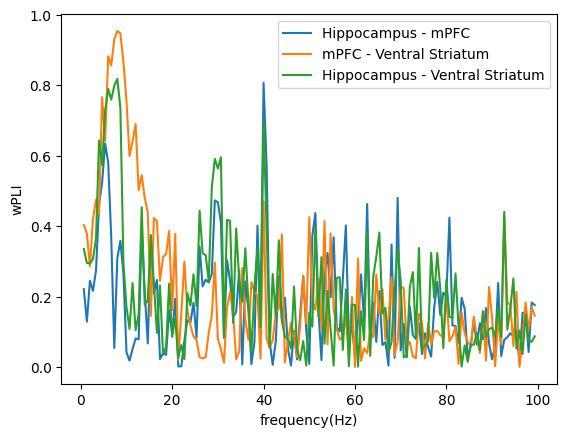

In [116]:
# WPLI
#Notice that converted_to_trials form of data shoud be importing into function below
def WPLI(reg1,reg2,f_s):
    #############################
    # Your code goes here
    n=len(reg1) #n=120
    m=3000
    w=sp.signal.windows.boxcar(m)
    f=sp.signal.csd(reg1[str(1)],reg2[str(1)],fs=f_s,window=w,nperseg=m)[0] #extracting frequencies
    num=np.imag(sp.signal.csd(reg1[str(1)],reg2[str(1)],fs=f_s,window=w,nperseg=m)[1]) 
    denom=np.abs(np.imag(sp.signal.csd(reg1[str(1)],reg2[str(1)],fs=f_s,window=w,nperseg=m)[1]))

    for i in range(1,n):
        num=num+np.imag(sp.signal.csd(reg1[str(i+1)],reg2[str(i+1)],fs=f_s,window=w,nperseg=m)[1])
        denom=denom+np.abs(np.imag(sp.signal.csd(reg1[str(i+1)],reg2[str(i+1)],fs=f_s,window=w,nperseg=m)[1]))
    num=num/n
    denom=denom/n
    wPLI=np.abs(num)/denom

    #############################
    return [f,wPLI]

k=150
plt.figure(1)
plt.plot(WPLI(data_trials[0],data_trials[1],fs)[0][0:k],WPLI(data_trials[0],data_trials[1],fs)[1][0:k],label="Hippocampus - mPFC")
plt.plot(WPLI(data_trials[1],data_trials[2],fs)[0][0:k],WPLI(data_trials[1],data_trials[2],fs)[1][0:k],label="mPFC - Ventral Striatum")
plt.plot(WPLI(data_trials[0],data_trials[2],fs)[0][0:k],WPLI(data_trials[0],data_trials[2],fs)[1][0:k],label="Hippocampus - Ventral Striatum")
plt.xlabel("frequency(Hz)")
plt.ylabel("wPLI")
plt.legend()

A strong peak at 40 Hz can be easily seen, this is the characteristic of gamma entrainment.